### 0. Import Libraries

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 1. ETL (Extract, Transform, and Load) data

In [25]:
# Import insurance dataset
df = pd.read_csv("C:/Users/Alberto/OneDrive/Escritorio/sklearn-umb-cs-workshop/datasets/insurance.csv")

# Check the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Data Cleaning

In [17]:
# # Use LabelEncoder to convert categorical features into numerical features, as
# models can't work with non-numerical values.
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])

### 3. Train-Test-Validation Split

In [18]:
# Select X and Y
# X is the input data, Y is the corresponding output data.
X = df[["age", "sex", "bmi", "children", "smoker", "region"]]
Y = df["charges"]

# Split data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [19]:
# Scale data by normalizing the numerical data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 4. Exploratory Data Analysis


In [22]:
df.sort_values(by="charges", ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.410,0,1,2,63770.42801
1300,45,1,30.360,0,1,2,62592.87309
1230,52,1,34.485,3,1,1,60021.39897
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
...,...,...,...,...,...,...,...
22,18,1,34.100,0,0,2,1137.01100
663,18,1,33.660,0,0,2,1136.39940
1244,18,1,33.330,0,0,2,1135.94070
808,18,1,30.140,0,0,2,1131.50660


### 6. Model Selection and Implementation

In [30]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

# Build model
LinRegModel = LinearRegression()
LassoModel = linear_model.Lasso()
ElasticModel = ElasticNet()
# Train the model
LinRegModel.fit(X_train_scaled, y_train)
LassoModel.fit(X_train_scaled, y_train)
ElasticModel.fit(X_train_scaled, y_train)

# Predict against the testing set
y_pred_LinReg = LinRegModel.predict(X_test_scaled)
y_pred_Lasso = LassoModel.predict(X_test_scaled)
y_pred_Elastic = ElasticModel.predict(X_test_scaled)

### 7. Model Evaluation

In [37]:
# Evaluate the model.
mean_LinReg = np.mean(y_pred_LinReg, axis=0)
std_LinReg = np.std(y_pred_LinReg, axis=0)
mae_LinReg = mean_absolute_error(y_test, y_pred_LinReg)
mse_LinReg = mean_squared_error(y_test, y_pred_LinReg)
r2_LinReg = r2_score(y_test, y_pred_LinReg)

mean_Lasso = np.mean(y_pred_Lasso, axis=0)
std_Lasso = np.std(y_pred_Lasso, axis=0)
mae_Lasso = mean_absolute_error(y_test, y_pred_Lasso)
mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
r2_Lasso = r2_score(y_test, y_pred_Lasso)

mean_Elastic = np.mean(y_pred_Elastic, axis=0)
std_Elastic = np.std(y_pred_Elastic, axis=0)
mae_Elastic = mean_absolute_error(y_test, y_pred_Elastic)
mse_Elastic = mean_squared_error(y_test, y_pred_Elastic)
r2_Elastic = r2_score(y_test, y_pred_Elastic)

In [48]:
# Print the evaluation metrics
print("-----------------------------")
print("LinReg")
print(f"Average cost of insurance: {mean_LinReg}")
print(f"Standaraard Deviation: {std_LinReg}")
print(f"Mean Absolute Error MAE: {mae_LinReg}")
print(f"Mean Squared Error MSE: {mse_LinReg}")

print(f"R Squared R^2 score: {r2_LinReg}")

print("-----------------------------")
print("Lasso")
print(f"Average cost of insurance: {mean_Lasso}")
print(f"Standaraard Deviation: {std_Lasso}")
print(f"Mean Absolute Error MAE: {mae_Lasso}")
print(f"Mean Squared Error MSE: {mse_Lasso}")

print(f"R Squared R^2 score: {r2_Lasso}")
print("-----------------------------")
print("ElasticNet")
print(f"Average cost of insurance: {mean_Elastic}")
print(f"Standaraard Deviation: {std_Elastic}")
print(f"Mean Absolute Error MAE: {mae_Elastic}")
print(f"Mean Squared Error MSE: {mse_Elastic}")

print(f"R Squared R^2 score: {r2_Elastic}")

-----------------------------
LinReg
Average cost of insurance: 13094.100025038779
Standaraard Deviation: 10765.1788191392
Mean Absolute Error MAE: 4186.013125281085
Mean Squared Error MSE: 33633113.93606516
R Squared R^2 score: 0.7833598148410806
-----------------------------
Lasso
Average cost of insurance: 13094.180279409657
Standaraard Deviation: 10760.02404414028
Mean Absolute Error MAE: 4185.065694783817
Mean Squared Error MSE: 33638837.03764796
R Squared R^2 score: 0.7833229507615626
-----------------------------
ElasticNet
Average cost of insurance: 13281.235282045962
Standaraard Deviation: 2431.2704935676556
Mean Absolute Error MAE: 7831.707389666647
Mean Squared Error MSE: 108676387.65810156
R Squared R^2 score: 0.2999853421420049


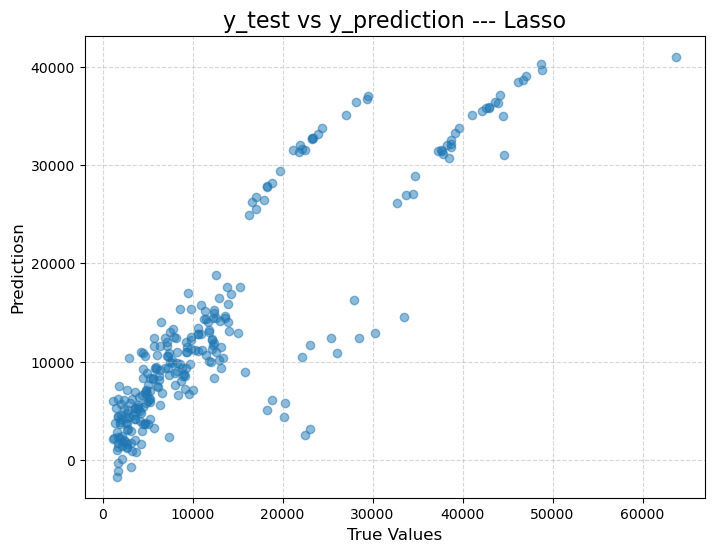

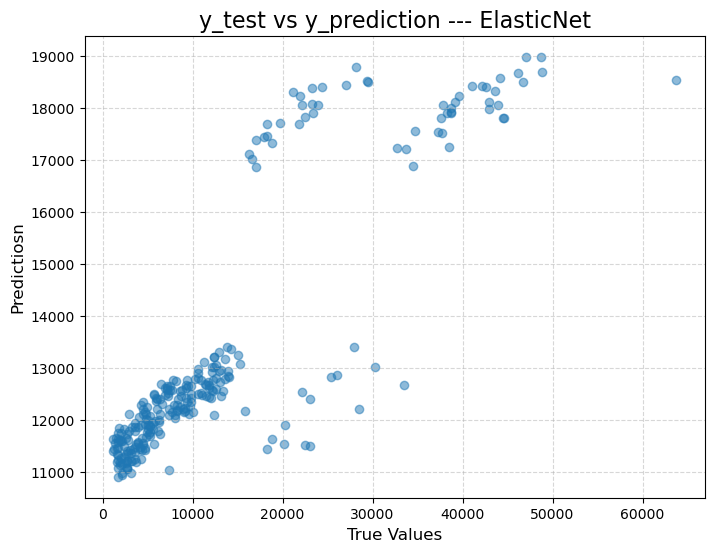

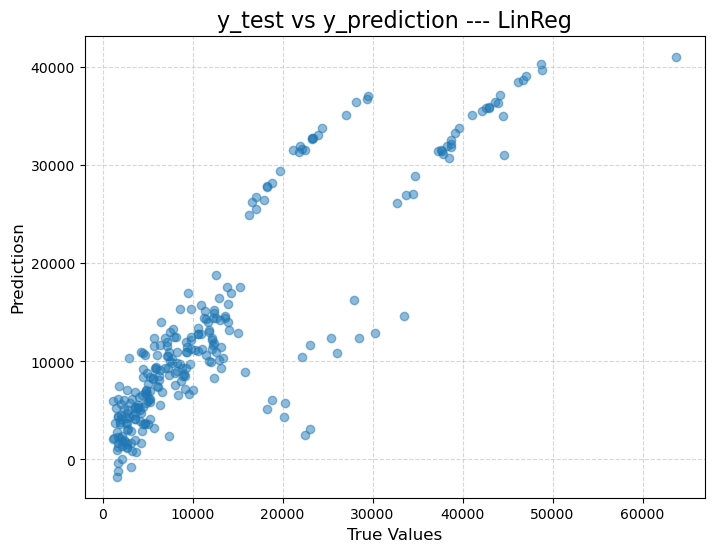

In [53]:
# Show the plot graph
def scatter(y_true, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha =0.5)
    plt.title(title, fontsize=16)
    plt.xlabel("True Values", fontsize=12)
    plt.ylabel("Predictiosn", fontsize=12)
    plt.grid(True, linestyle="--", alpha = 0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

scatter(y_test, y_pred_Lasso, "y_test vs y_prediction --- Lasso")
scatter(y_test, y_pred_Elastic, "y_test vs y_prediction --- ElasticNet")
scatter(y_test, y_pred_LinReg, "y_test vs y_prediction --- LinReg")

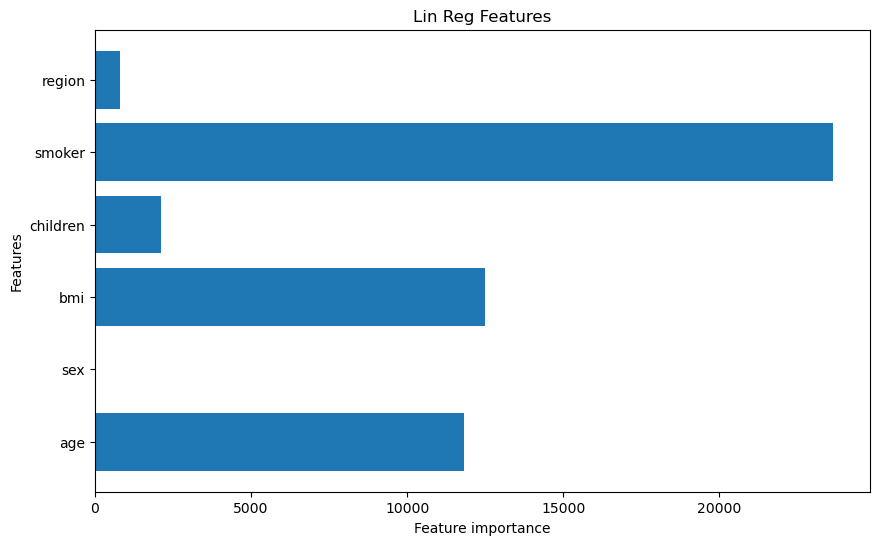

In [60]:
# 7.1

feature_importance = abs(LinRegModel.coef_)
feature_names = ["age", "sex", "bmi", "children", "smoker", "region"]
plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.title("Lin Reg Features")

plt.show()

In [62]:
# Job Lib Dump

import joblib

joblib.dump(LinRegModel, "LinRegModel.joblib")

LassoImport = joblib.load("LinRegModel.joblib")

LassoImport.predict(X_test_scaled)

array([ 8.74759010e+03,  7.00338785e+03,  3.67547528e+04,  9.33857637e+03,
        2.69255056e+04,  1.08477713e+04,  1.43934736e+01,  1.69338192e+04,
        7.75803303e+02,  1.11374689e+04,  2.78615578e+04,  9.31897489e+03,
        5.20774306e+03,  3.85097970e+04,  4.03342797e+04,  3.71517659e+04,
        1.53420086e+04,  3.59393396e+04,  9.04028204e+03,  3.13565713e+04,
        3.60415513e+03,  9.99195342e+03,  2.20468089e+03,  7.09057939e+03,
        1.12144023e+04,  1.28299515e+04,  1.44029495e+04,  6.09776535e+03,
        9.75898830e+03,  2.12817607e+03,  8.93815006e+03,  1.30314646e+04,
        4.56877578e+03,  3.22217253e+03,  4.28957723e+03,  1.29840820e+04,
        1.76678671e+03,  8.64342793e+03,  3.31337502e+04,  3.25938987e+04,
        3.72077930e+03,  4.27503345e+03,  1.40440965e+04,  1.13055763e+04,
        8.79193812e+03,  1.19000029e+04,  5.25751718e+03,  2.91235263e+03,
        3.55121842e+04,  9.19911274e+03,  1.58641694e+04,  2.28455877e+03,
        1.24349898e+04,  